<img src = "http://www.evanmarie.com/content/files/images/apis_json_cleaning_banner.png" width = 850>

# APIs, JSON files, and Data Clearning
### ~ Evan Marie Carr

## FBI Most Wanted API:
* does not require an api key
* has very little documentation aside from a few examples
* fairly simple and straight forward


In [148]:
import pandas as pd
import requests
import json
from IPython.display import HTML
import numpy as np
pd.options.display.max_columns = 60

---
## Importing Data:

### These are the specific methods used below (each has linked documentation):

* [Requests Library Documetation](https://requests.readthedocs.io/en/latest/user/quickstart/)
* [`requests.get`](https://www.w3schools.com/python/ref_requests_get.asp) - sends a `get` request to the `http` specified for the parameters specified
* [`requests.Response`](https://www.w3schools.com/python/ref_requests_response.asp) - the object data type returned when using `requests.get()`
* [`json.loads()`](https://www.geeksforgeeks.org/python-difference-between-json-load-and-json-loads/#:~:text=load()%20takes%20a%20file,it%20accepts%20a%20file%20object.) - used to parse JSON data and convert it to a Python dictionary
* [`response.content`](https://www.geeksforgeeks.org/response-content-python-requests/) - returns the entire contents of the query


### Example Searches from FBI Most Wanted Site:
* These search examples are the extent of the documentation the FBI Most Wanted website gives as documentation for how to use its API


In [149]:
# Data from Atlanta field office
response = requests.get('https://api.fbi.gov/wanted/v1/list', params={
    'field_offices': 'atlanta'
})

data = json.loads(response.content)
print("From the Atlanta field office: ", data['total'])
print(data['items'][0]['title'], "\n")

# Second page of data from entire list
response = requests.get('https://api.fbi.gov/wanted/v1/list', params={
    'page': 2
})

data = json.loads(response.content)
print("Page No.: ", data['page'])
print(data['items'][0]['title'], "\n")

# ----------------------------------------------------------------------- #

# Entire list, which is imported only 1 page at a time
response = requests.get('https://api.fbi.gov/wanted/v1/list')
data = json.loads(response.content)

database_length = data['total']

print("Length of entire most wanted list: ", data['total'])
print(data['items'][0]['title'], "\n")

From the Atlanta field office:  13
DIEGO TREJO 

Page No.:  2
KRISTIN DENISE SMART 

Length of entire most wanted list:  957
JEANINE DE RIDDERE 



---
## JSON data before converted to Pandas:

In [150]:
data['items'][0]

{'scars_and_marks': None,
 'warning_message': None,
 'modified': '2022-12-11T00:02:59+00:00',
 'hair_raw': 'Brown',
 'title': 'JEANINE DE RIDDERE',
 'race': 'white',
 'possible_countries': None,
 'remarks': '<p>Jeanine De Riddere speaks English and may speak other languages. She has dual citizenship in Belgium and the Democratic Republic of Congo. She may travel to Dubai, United Arab Emirates and Belgium.</p>',
 'person_classification': 'Accomplice',
 'uid': '33202d83a9877c6ae8953b018de15057',
 'nationality': 'Congolese',
 'url': 'https://www.fbi.gov/wanted/parental-kidnappings/jeanine-deriddere',
 'publication': '2012-02-07T07:00:00',
 'legat_names': None,
 'hair': 'brown',
 'eyes': 'brown',
 'build': None,
 'age_min': None,
 'weight': '130 to 135 pounds (approximately 59 kg)',
 'field_offices': ['miami'],
 'details': None,
 'weight_min': None,
 'path': '/wanted/parental-kidnappings/jeanine-deriddere',
 'languages': None,
 'subjects': ['Parental Kidnapping'],
 'age_range': None,
 'pos

---
## Working with imported data, creating dataframe:

In [151]:
print("json.loads() has decoded the data to: ", type(json.loads(response.content)), '\n')

json.loads() has decoded the data to:  <class 'dict'> 



In [152]:
page_one_df = pd.DataFrame(data['items'])

#### Getting general knowledge of the data:

In [153]:
col_total = page_one_df.shape[1]
rows_total = page_one_df.shape[0]
pages_total = database_length // rows_total + 1

print(f"Each page of the JSON data has {rows_total} rows and {col_total} columns.")

print(f"The entire database has {database_length} entries.")

print(f"There are {pages_total} total pages of data in the database.\n")

Each page of the JSON data has 20 rows and 53 columns.
The entire database has 957 entries.
There are 48 total pages of data in the database.



### Data column informtion:
* I will use these when creating the dataframe with a custom function
* The list `database_cols` will be used to initialize the new dataframe

In [154]:
page_one_df.columns

Index(['scars_and_marks', 'warning_message', 'modified', 'hair_raw', 'title',
       'race', 'possible_countries', 'remarks', 'person_classification', 'uid',
       'nationality', 'url', 'publication', 'legat_names', 'hair', 'eyes',
       'build', 'age_min', 'weight', 'field_offices', 'details', 'weight_min',
       'path', 'languages', 'subjects', 'age_range', 'possible_states',
       'status', 'eyes_raw', 'place_of_birth', 'coordinates', 'race_raw',
       'sex', 'weight_max', 'description', 'occupations', 'reward_min',
       'files', 'dates_of_birth_used', 'age_max', 'caution',
       'additional_information', 'suspects', 'height_max', 'aliases',
       'height_min', 'ncic', 'reward_max', 'complexion', 'images', 'locations',
       'reward_text', '@id'],
      dtype='object')

In [155]:
database_cols = ['details', 'languages', 'ncic', 'weight_max', 'path', 'reward_min',
       'coordinates', 'description', 'nationality', 'race_raw', 'sex',
       'additional_information', 'weight_min', 'possible_countries',
       'locations', 'complexion', 'build', 'hair', 'aliases', 'height_min',
       'uid', 'files', 'legat_names', 'reward_text', 'url', 'possible_states',
       'place_of_birth', 'height_max', 'race', 'scars_and_marks', 'hair_raw',
       'caution', 'remarks', 'occupations', 'age_min', 'publication',
       'age_range', 'person_classification', 'status', 'modified',
       'field_offices', 'dates_of_birth_used', 'subjects', 'images', 'age_max',
       'weight', 'title', 'eyes_raw', 'eyes', 'warning_message', 'suspects',
       'reward_max', '@id']

---
## Custom function to create a dataframe by importing data page by page:
* Since the data comes in one page at a time, this function will combine all rows of data available into one dataframe, converting each page and concatenating each loop.

In [156]:
# function to get all pages

def get_wanted_data():
    page = 1
    entire_database = pd.DataFrame(columns = database_cols)
    
    for item in range((database_length // rows_total) + 1):
        current_response = requests.get('https://api.fbi.gov/wanted/v1/list', params={'page': page})
        current_data = json.loads(current_response.content)
        current_df = pd.DataFrame(current_data['items'])
        entire_database = pd.concat([entire_database, current_df])
        if page % 10 == 0:
            print(f"Pages up through page {page} have been added to database...")
        page += 1
    print("All pages have been added. Database complete.\n")
    return entire_database

In [157]:
entire_df = get_wanted_data()

Pages up through page 10 have been added to database...
Pages up through page 20 have been added to database...
Pages up through page 30 have been added to database...
Pages up through page 40 have been added to database...
All pages have been added. Database complete.



#### Completed raw dataframe information:

In [158]:
most_wanted = entire_df.copy()

In [159]:
total_rows = most_wanted.shape[0]
total_cols = most_wanted.shape[1]

print(f"The most_wanted dataframe contains {total_rows} rows and {total_cols} columns.\n")

The most_wanted dataframe contains 957 rows and 53 columns.



---
## The raw data after converting from JSON data to Pandas dataframe:
* Upon overviw, it is clear there is much cleaning to be done

In [160]:
most_wanted.sample(5)

,details,languages,ncic,weight_max,path,reward_min,coordinates,description,nationality,race_raw,sex,additional_information,weight_min,possible_countries,locations,complexion,build,hair,aliases,height_min,uid,files,legat_names,reward_text,url,possible_states,place_of_birth,height_max,race,scars_and_marks,hair_raw,caution,remarks,occupations,age_min,publication,age_range,person_classification,status,modified,field_offices,dates_of_birth_used,subjects,images,age_max,weight,title,eyes_raw,eyes,warning_message,suspects,reward_max,@id
5,"<p>On June 24, 2013, Amy Wells Bridgeman left ...",None,None,180.0,/wanted/vicap/missing-persons/amy-wells-bridgeman,0,[],"Weldon, North Carolina\r\nJune 24, 2013",None,White,Female,None,180.0,None,None,None,None,brown,None,62.0,680822c5-0b9a-4e0e-8608-6d14f46df08f,"[{'name': 'English', 'url': 'https://www.fbi.g...",None,None,https://www.fbi.gov/wanted/vicap/missing-perso...,[US-UM],None,62.0,white,"Back of Neck: ""True Slave"" and ""Pain is Beaut...",Brown (changes it to black),None,None,None,42.0,2014-02-20T07:00:00,42 years old,Victim,na,2022-12-05T00:11:51+00:00,None,None,[ViCAP Missing Persons],[{'thumb': 'https://www.fbi.gov/wanted/vicap/m...,42.0,180 pounds,"AMY WELLS BRIDGEMAN - WELDON, NORTH CAROLINA",Blue,blue,None,None,0,https://api.fbi.gov/@wanted-person/680822c5-0b...
6,"<p>On Wednesday, September 23, 1998, 19 year-o...",None,None,150.0,/wanted/vicap/missing-persons/amber-lynn-wilde,0,[],"September 23, 1998\r\nGreen Bay, Wisconsin",None,White,Female,None,135.0,None,None,None,None,brown,None,66.0,b70289d226144e6a93909390a353ec99,"[{'name': 'English', 'url': 'https://www.fbi.g...",None,None,https://www.fbi.gov/wanted/vicap/missing-perso...,None,None,66.0,white,Both ears have been pierced eight times.,"Brown (Straight, longer than shoulder length)",None,"<p>Vehicle information: 1988 silver GL Subaru,...",None,NaN,2017-02-21T10:48:00,None,Victim,na,2022-12-05T00:12:06+00:00,None,None,[ViCAP Missing Persons],[{'thumb': 'https://www.fbi.gov/wanted/vicap/m...,NaN,135 - 150 pounds,"AMBER LYNN WILDE - GREEN BAY, WISCONSIN",Brown,brown,None,None,0,https://api.fbi.gov/@wanted-person/b70289d2261...
13,<p>Investigators assigned to the FBI Richmond ...,None,None,NaN,/wanted/seeking-info/tahir-mahmud,0,[],"Murder Victim\r\nDanville, Virginia\r\nSeptemb...",None,None,None,None,NaN,None,None,None,None,None,None,NaN,c6ab669db87a476bbaa53e9c65dd6208,"[{'name': 'English', 'url': 'https://www.fbi.g...",None,"The FBI is offering a reward of up to $7,500 f...",https://www.fbi.gov/wanted/seeking-info/tahir-...,None,None,NaN,None,None,None,None,None,None,NaN,2017-12-19T09:45:00,None,Victim,na,2022-12-05T00:06:05+00:00,[richmond],None,[Seeking Information],[{'thumb': 'https://www.fbi.gov/wanted/seeking...,NaN,None,TAHIR MAHMUD,None,None,None,None,0,https://api.fbi.gov/@wanted-person/c6ab669db87...
16,<p>The Federal Bureau of Investigation's Albuq...,None,None,130.0,/wanted/seeking-info/zachariah-juwaun-shorty,0,[],"Homicide Victim\r\nNenahnezad, New Mexico\r\nJ...",None,Native American,Male,None,130.0,None,None,None,None,black,None,65.0,f042ad53ce1c4b68ab820440a9529c67,"[{'name': 'English', 'url': 'https://www.fbi.g...",None,"The FBI is offering a reward of up to $10,000 ...",https://www.fbi.gov/wanted/seeking-info/zachar...,None,None,65.0,native,"Shorty has the following tattoos: the words ""I...",Black,None,"<p>Shorty lived in Kirtland, New Mexico.</p>",None,NaN,2021-02-05T08:51:00,None,Main,na,2022-12-05T00:12:11+00:00,[albuquerque],"[May 5, 1997]","[Seeking Information, Indian Country, Navajo]",[{'thumb': 'https://www.fbi.gov/wanted/seeking...,NaN,130 pounds,ZACHARIAH JUWAUN SHORTY,Brown,brown,None,None,0,https://api.fbi.gov/@wanted-person/f042ad53ce1...
3,"<p>On the night of October 11, 2001, at approx...",None,None,NaN,/wanted/seeking-info/thomas-crane-wales,1000000,[],"Murder Victim\r\nSeattle, Washington\r\nOctobe...",None,None,,<p>You can contact us anonymously by email at ...,NaN,None,None,None,None,No

In [161]:
most_wanted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957 entries, 0 to 16
Data columns (total 53 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   details                 547 non-null    object 
 1   languages               87 non-null     object 
 2   ncic                    259 non-null    object 
 3   weight_max              627 non-null    float64
 4   path                    957 non-null    object 
 5   reward_min              957 non-null    object 
 6   coordinates             957 non-null    object 
 7   description             957 non-null    object 
 8   nationality             397 non-null    object 
 9   race_raw                713 non-null    object 
 10  sex                     797 non-null    object 
 11  additional_information  22 non-null     object 
 12  weight_min              627 non-null    float64
 13  possible_countries      113 non-null    object 
 14  locations               4 non-null      obj

---
## Data cleaning:
* The raw data is very unusable for analysis at first importing
* The next steps will remedy these issues one at a time

#### Columns to retain:
* There are a number of columns that will not be useful for investigation. 
* The following columns are the ones that will be used in this data investigation

In [162]:
keepers = ['title', 'images', 'field_offices', 'files', 'details', 'subjects', 'nationality', 'sex', 'race_raw', 'dates_of_birth_used', 'warning_message', 'reward_text']

In [163]:
most_wanted = most_wanted[keepers]

In [164]:
total_rows = most_wanted.shape[0]
total_cols = most_wanted.shape[1]

print(f"The entire dataframe now contains {total_rows} rows and {total_cols} columns.\n")

The entire dataframe now contains 957 rows and 12 columns.



---
## `title` (name) column:
#### Check that no `title` (name) values missing:

In [165]:
print("There are", most_wanted.title.isna().sum(), "missing values in the title column.\n")

There are 0 missing values in the title column.



#### Rename `title` column to `name`:
* [`df.rename()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html) - used to rename the columns of a dataframe. Provide `columns = {}` and a dictionary with the old names as keys and new names as values.

In [166]:
most_wanted.rename(columns = {'title':'name'}, inplace = True)

---
## Parse `files` column for poster:
* The `files` column contains a list with a dictionary that contains the language of a poster and then url link for that poster.

In [167]:
print('The values in the files column are in', (type(most_wanted.files.iloc[0])), 'format.\n')

The values in the files column are in <class 'list'> format.



The current breakdown of the `files` column fields:
* [`df.iloc[]`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html) - used to locate a values in a dataframe by integer indexing

In [168]:
print(type(most_wanted.files.iloc[0]), '--', most_wanted.files.iloc[0])
print(type(most_wanted.files.iloc[0][0]), '--', most_wanted.files.iloc[0][0])
print(type(most_wanted.files.iloc[0][0]['url']), '--', most_wanted.files.iloc[0][0]["url"])

<class 'list'> -- [{'name': 'English', 'url': 'https://www.fbi.gov/wanted/parental-kidnappings/jeanine-deriddere/download.pdf'}]
<class 'dict'> -- {'name': 'English', 'url': 'https://www.fbi.gov/wanted/parental-kidnappings/jeanine-deriddere/download.pdf'}
<class 'str'> -- https://www.fbi.gov/wanted/parental-kidnappings/jeanine-deriddere/download.pdf


### Extracting the url and saving in a new `poster` column:
* First, I will loop through the `files` column and isolate the link path for the poster
* Then I will save value in the field as just the poster path
* Finally, I rename the column to reflect that it contains just the poster path

In [169]:
for idx, value in enumerate(most_wanted['files']):
    link = value[0]['url']
    most_wanted.iloc[idx]['files'] = link

most_wanted.rename(columns = {'files': 'poster'}, inplace = True)

In [170]:
most_wanted.sample(5)

,name,images,field_offices,poster,details,subjects,nationality,sex,race_raw,dates_of_birth_used,warning_message,reward_text
12,CARLA VICENTINI,[{'thumb': 'https://www.fbi.gov/wanted/kidnap/...,[newark],https://www.fbi.gov/wanted/kidnap/carla-vicent...,<p>Carla Vicentini was last seen leaving a bar...,[Kidnappings and Missing Persons],None,Female,White,"[April 29, 1983]",None,"The FBI is offering a reward of up to $20,000 ..."
11,SARAH BURTON,[{'thumb': 'https://www.fbi.gov/wanted/kidnap/...,[kansascity],https://www.fbi.gov/wanted/kidnap/sarah-burton...,"<p>Sarah Burton, age 29 (at the time of her di...",[Kidnappings and Missing Persons],None,Female,White,"[February 22, 1990]",None,"The FBI is offering a reward of up to $5,000 f..."
2,KRISTEN MODAFFERI,[{'thumb': 'https://www.fbi.gov/wanted/kidnap/...,[sanfrancisco],https://www.fbi.gov/wanted/kidnap/kristen-moda...,<p>Kristen Modafferi was last seen on the afte...,[Kidnappings and Missing Persons],None,Female,White,"[June 1, 1979]",None,None
17,ISMAIL SHALASH,[{'thumb': 'https://www.fbi.gov/wanted/wcc/ism...,[cincinnati],https://www.fbi.gov/wanted/wcc/ismail-shalash/...,None,[White-Collar Crime],None,Male,None,"[June 28, 1985]",None,None
17,BALDOMERO BARRIENTOS BANUELOS,[{'thumb': 'https://www.fbi.gov/wanted/murders...,[losangeles],https://www.fbi.gov/wanted/murders/baldomero-b...,None,[Violent Crime - Murders],Mexican,Male,White (Hispanic),"[October 7, 1951]",SHOULD BE CONSIDERED ARMED AND DANGEROUS,"The FBI is offering a reward of up to $5,000 f..."


---
## Parse `images` column to keep one main image only:
* The `images` column contains a list with a dictionary a number of different images of each individual
* For the purposes of this project, I will retain just the first image in the list
* I will then rename the `images` column to just `image` to reflect that it holds one image of each individual

#### The nested layers inside the `images` fileds:

In [171]:
print(type(most_wanted.images.iloc[0]), '--', most_wanted.images.iloc[0], "\n")
print(type(most_wanted.images.iloc[0][0]), '--', most_wanted.images.iloc[0][0], "\n")
print(type(most_wanted.images.iloc[0][0]['thumb']), '--', most_wanted.images.iloc[0][0]["thumb"], "\n")

<class 'list'> -- [{'thumb': 'https://www.fbi.gov/wanted/parental-kidnappings/jeanine-deriddere/@@images/image/thumb', 'original': 'https://www.fbi.gov/wanted/parental-kidnappings/jeanine-deriddere/@@images/image', 'caption': None, 'large': 'https://www.fbi.gov/wanted/parental-kidnappings/jeanine-deriddere/@@images/image/large'}] 

<class 'dict'> -- {'thumb': 'https://www.fbi.gov/wanted/parental-kidnappings/jeanine-deriddere/@@images/image/thumb', 'original': 'https://www.fbi.gov/wanted/parental-kidnappings/jeanine-deriddere/@@images/image', 'caption': None, 'large': 'https://www.fbi.gov/wanted/parental-kidnappings/jeanine-deriddere/@@images/image/large'} 

<class 'str'> -- https://www.fbi.gov/wanted/parental-kidnappings/jeanine-deriddere/@@images/image/thumb 



In [172]:
for idx, value in enumerate(most_wanted['images']):
    image_link = value[0]['original']
    most_wanted.iloc[idx]['images'] = image_link

In [173]:
most_wanted.rename(columns = {'images': 'image'}, inplace = True)

#### Example image from first row of dataframe:
* This format can now be viewed within the notebook using the `HTML` module

In [182]:
most_wanted.iloc[0].image

'https://www.fbi.gov/wanted/parental-kidnappings/jeanine-deriddere/@@images/image'

#### Function to give the `HTML` module a working path to display images:

In [174]:
def path_to_image_html(path):
    return '<img src="'+ path + '" width="125" >'

#### Examples from the dataframe

In [180]:
HTML(most_wanted[0:6][['name', 'image']].to_html(escape=False, formatters=dict(image=path_to_image_html)))

,name,image
0,JEANINE DE RIDDERE,
1,FRANCINA DACANAY FERNANDEZ,
2,MICHAEL ALEXANDER REYES,
3,"MOHAMMAD HUSSAIN METLA, JR.",
4,MARIA BELEN FRANCESCONI,
5,FLORA MAHMOOD,


---
## Missing persons (data investigation):
#### Search `details` column for missing persons categorization:
* This database contains not only criminals that the FBI is looking for, but also missing persons of great interest. 
* Beause there are still tricky values in some of the fields in the `details` column that would hinder a search, all of the fields must be converted to strings
* [`df.column.astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html) - converts all the contents of the column to string values
* The following masks will filter out the majority of common phrases that are involved in the `details` column of a row representing a missing person
* [`df.loc[]`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html) - locates values in a dataframe based upon labels and is very useful with masks. 

In [183]:
most_wanted.details = most_wanted.details.astype(str)
missing_person_mask = most_wanted.details.str.contains('missing person')
went_missing_mask = most_wanted.details.str.contains('went missing')
has_been_missing_mask = most_wanted.details.str.contains('has been missing')
foul_play_mask = most_wanted.details.str.contains('foul play')
reported_missing_mask = most_wanted.details.str.contains('reported_missing')

In [184]:
missing_df = most_wanted.loc[missing_person_mask | 
                             went_missing_mask | 
                             has_been_missing_mask | 
                             foul_play_mask]

In [185]:
missing_df.details[2]

'<p>Cydney Mizell, an American Non-Governmental Organization worker, has been missing since January of 2008, when she was abducted along with her driver by unidentified gunmen from Kandahar City, Afghanistan.\xa0 Mizell was likely killed by her captors in 2008, and may have been buried in the Kandahar area.\xa0 Mizell spoke fluent Pashto after living and working in Kandahar for three years empowering Afghan women and children.</p>\r\n<p>\xa0</p>'

In [186]:
print('There are', len(missing_df), 'out of', len(most_wanted), 'records that are very likely missing persons. \n')

There are 37 out of 957 records that are very likely missing persons. 



---
## `dates_of_birth_used` column to datetime:
* The `dates_of_birth_used` column contains `list` values, many with only one date, but some with multiple.
* These dates should be converted to `datetime` objects to be more useable

In [187]:
print('The birthdate columns is currently in', type(most_wanted.dates_of_birth_used[0]), "format.")

The birthdate columns is currently in <class 'pandas.core.series.Series'> format.


#### Parsing the `dates_of_birth_used` column and convert all birthdates to datetime:
* Because the birthdates are in list format in the fields for each record, it is not possible to pass the entire column to `pd.to_datetime()`. The lists of multiple dates must first be unpacked with `pd.explode()`
* [`pd.explode()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.explode.html) - Transform each element of a list-like to a row, replicating index values.
* The resulting dataframe with have multiple rows for records with multiple birthdates listed, however the same records will keep the same unique id / index. 


In [188]:
most_wanted = most_wanted.explode('dates_of_birth_used')

In [189]:
most_wanted.dates_of_birth_used = pd.to_datetime(most_wanted.dates_of_birth_used, errors = 'coerce')

In [190]:
most_wanted.rename(columns = {'dates_of_birth_used': 'birthdates_used'}, inplace = True)

In [191]:
most_wanted[['name', 'birthdates_used', 'subjects']].sample(5)

,name,birthdates_used,subjects
15,ALI HAMAD A ALZABARAH,1983-09-08,[Counterintelligence]
1,"JOHN DOE - LAKE BARKLEY, KENTUCKY",NaT,[ViCAP Unidentified Persons]
5,UNKNOWN INDIVIDUAL - JOHN DOE 41,NaT,[ECAP]
3,DAVID WILLIAMS,1962-10-09,[Kidnappings and Missing Persons]
19,JOSEPH WAYNE McCOOL,1947-10-03,[White-Collar Crime]


---
## `subjects` (categories) column:
* The `subjects` column mainly contains the offense or offenses that an individual is charged with
* Many rows contain more than one offense
* For data analysis and comparison, it would be helpful to be able to, for example, use `df.column.value_counts()` to see how many of each offese is present.
* This again calls for `pd.explode()` to expand those lists
* This column also would make a bit more sense if it was named "category", so I will do that here as well.

In [192]:
most_wanted = most_wanted.explode('subjects')

In [193]:
most_wanted = most_wanted.rename(columns = {'subjects': 'category'})

In [194]:
most_wanted.category.value_counts().head(10)

Seeking Information                199
Cyber's Most Wanted                124
Kidnappings and Missing Persons    109
ViCAP Missing Persons               99
Violent Crime - Murders             97
Additional Violent Crimes           76
Counterintelligence                 65
ViCAP Unidentified Persons          53
Indian Country                      52
White-Collar Crime                  41
Name: category, dtype: int64

#### Missing Persons:
Now that this information has been parsed so that we can get a better look at it, we can now see that missing persons is a category with 99 entries

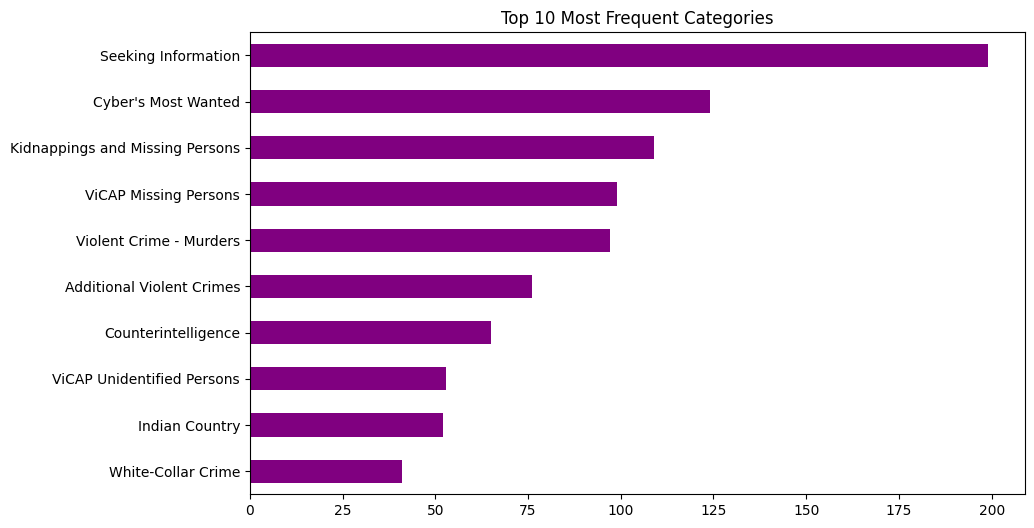

In [195]:
most_wanted.category.value_counts().head(10).sort_values().plot(kind = 'barh', title = "Top 10 Most Frequent Categories", color = 'purple', figsize=(10,6));

---
## Field Offices:
* Again, some of these fields contain multiple values
* `pd.explode()` will once again expand these to their own rows of data
* Looking at the exploded value counts, it is clear that the field office names are not in the most useful formats
* I will first capitalize the names of the field offices
* Then I will replace the field office names that are still problematic by providing a dictionary with the correct versions

In [196]:
most_wanted = most_wanted.explode('field_offices')

In [197]:
most_wanted.field_offices.value_counts()

newyork         117
washingtondc     95
albuquerque      82
newark           56
losangeles       55
miami            54
sacramento       31
portland         31
philadelphia     29
sanfrancisco     28
boston           28
chicago          27
baltimore        25
pittsburgh       24
atlanta          21
denver           21
omaha            20
houston          19
saltlakecity     19
phoenix          19
minneapolis      19
richmond         17
kansascity       15
charlotte        15
seattle          14
cleveland        13
indianapolis     10
sandiego         10
detroit          10
columbia         10
memphis           8
tampa             8
albany            8
littlerock        7
milwaukee         7
louisville        6
lasvegas          6
cincinnati        6
dallas            6
buffalo           6
stlouis           5
birmingham        5
oklahomacity      5
honolulu          5
elpaso            4
mobile            4
neworleans        4
sanjuan           4
jackson           3
norfolk           2


In [198]:
most_wanted['field_offices'] = most_wanted['field_offices'].str.capitalize()

bad_field_names = {
    'Newyork': 'New York',
    'Washingtondc': 'Washington D.C.',
    'Sanfrancisco': 'San Francisco',
    'Losangeles': 'Los Angeles',
    'Saltlakecity': 'Salt Lake City',
    'Kansascity': "Kansas City",
    'Sandiego': 'San Diego',
    'Littlerock': "Little Rock",
    'Lasvegas': 'Las Vegas',
    'Stlouis': 'St. Louis',
    'Oklahomacity': 'Oklahoma City',
    'Elpaso': 'El Paso',
    'Neworleans': 'New Orleans',
    'Sanjuan': 'San Juan',
    'Sanantonio': 'San Antonio',
    'Newhaven': 'New Haven'
}

most_wanted.field_offices = most_wanted.field_offices.apply(lambda x: (x in bad_field_names and bad_field_names[x]) or x)

In [199]:
most_wanted.field_offices.value_counts().head(10)

New York           117
Washington D.C.     95
Albuquerque         82
Newark              56
Los Angeles         55
Miami               54
Sacramento          31
Portland            31
Philadelphia        29
San Francisco       28
Name: field_offices, dtype: int64

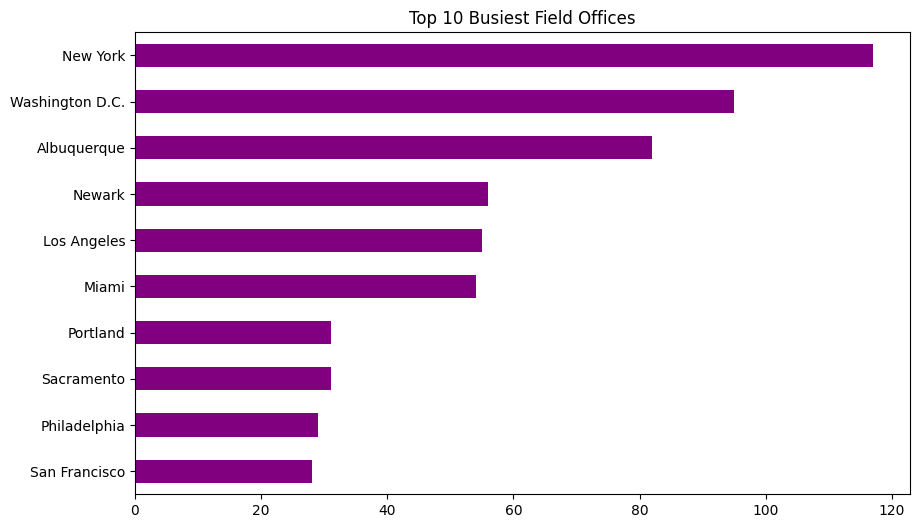

In [200]:
most_wanted.field_offices.value_counts().head(10).sort_values().plot(kind = 'barh', title="Top 10 Busiest Field Offices", color = 'purple', figsize=(10, 6));

---
# Nationality Column:
* The nationality looks good for the most part!

In [201]:
most_wanted.nationality.value_counts().head(10)

American      157
Mexican        67
Chinese        58
Iranian        52
Russian        51
Honduran       16
Canadian       13
Cuban          13
Haitian        13
Vietnamese      9
Name: nationality, dtype: int64

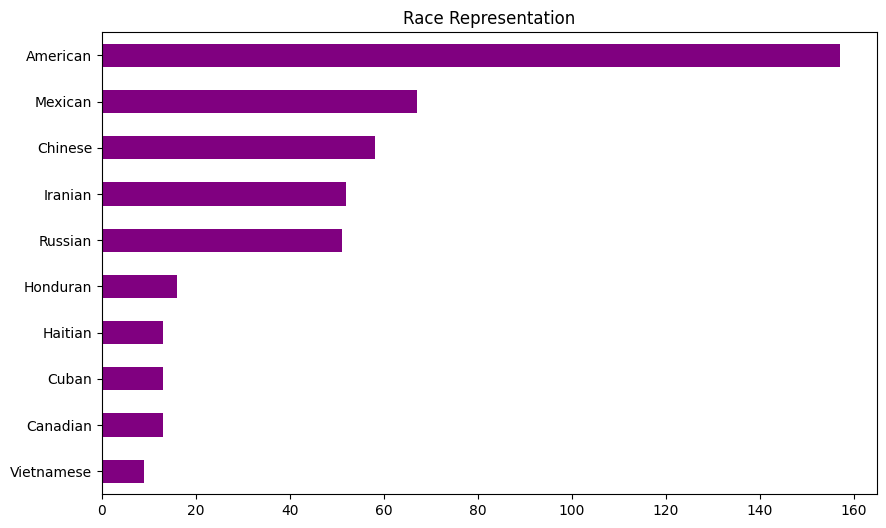

In [202]:
most_wanted.nationality.value_counts().head(10).sort_values().plot(kind = 'barh', title="Race Representation", color = 'purple', figsize=(10, 6));

---
## Sex column:
* While it is unfortunate to have any missing data, in the columns left to clean, any values marked `None` or just left empty will be filled with `NaN` to more accurately indicate that they are unknown values
* `NaN` is automatically more easily handled in Pandas than a variety of other ways of indicating unknown information.

In [203]:
most_wanted.sex.value_counts(dropna = False)

Male      775
Female    284
None      195
           28
Name: sex, dtype: int64

In [204]:
most_wanted['sex'].replace(['', None], np.nan, inplace = True)

In [205]:
most_wanted.sex.value_counts(dropna = False)

Male      775
Female    284
NaN       223
Name: sex, dtype: int64

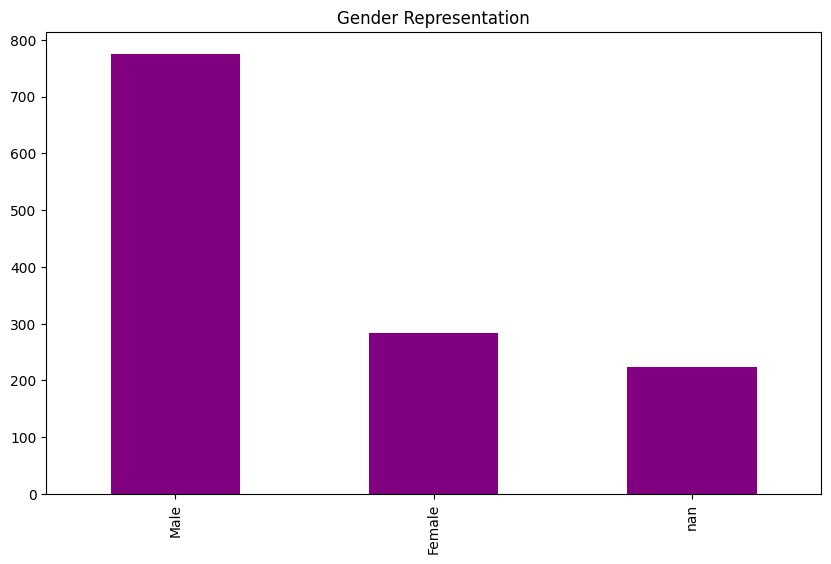

In [206]:
most_wanted.sex.value_counts(dropna = False).sort_values(ascending = False).plot(kind = 'bar', title="Gender Representation", color = 'purple', figsize=(10, 6));

---
## Race column:
* This is a challenging column many unique combinations of race
* Let's try to clean this up

In [207]:
most_wanted.race_raw.value_counts(dropna = False)

White                                                                        414
None                                                                         311
White (Hispanic)                                                             194
Black                                                                        112
Native American                                                               99
Asian                                                                         88
Black (Hispanic)                                                               8
White (Central Asian)                                                          7
Hispanic                                                                       6
Biracial (Asian and White)                                                     5
                                                                               5
White (Middle Eastern)                                                         3
Biracial (Native American an

### Steps to clean race column:
* First, any race fields that should be marked `NaN`, indicating an unknown value, will be fixed
* Second, it is important to make all races lowercase so that the masking and filtering that follows will be effective
* Third, it is important to create some masks for filtering and try to consolidate as many like fields as possible
* The masks should be applied in a particular order as to create the most accurate labeling, for example a field that says "white and hispanic" should be labeled as hispanic before filtering for white to retain as much accuracy as possible
* The latter will be applied for other races as well

In [208]:
most_wanted.race_raw.replace(['', 'Unknown', None, ], np.nan, inplace = True)

#### Making text lower case:

In [209]:
most_wanted.race_raw = most_wanted.race_raw.str.lower()

#### Creating masks for races:

In [210]:
hispanic_mask = most_wanted.race_raw.str.contains("hispanic") | most_wanted.race_raw.str.contains("latino")
asian_mask = most_wanted.race_raw.str.contains("asian") | most_wanted.race_raw.str.contains("vietnamese") 
middle_eastern_mask = most_wanted.race_raw.str.contains("middle eastern") | most_wanted.race_raw.str.contains("persian") | \
                     most_wanted.race_raw.str.contains("kuwaitian") # The proper term is Kuwaiti
black_mask = most_wanted.race_raw.str.contains("black", na=False)
native_american_mask = most_wanted.race_raw.str.contains("native american", na=False)
white_mask = most_wanted.race_raw.str.contains("white", na=False) | most_wanted.race_raw.str.contains("bi-racial", na=False)

#### Applying race masks:
* [`pd.df.mask()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mask.html) - replaces values where the mask condition is true.

In [211]:
most_wanted.race_raw = most_wanted.race_raw.astype(str)
most_wanted.race_raw = most_wanted.race_raw.mask(hispanic_mask, 'hispanic')
most_wanted.race_raw = most_wanted.race_raw.mask(asian_mask, 'asian')
most_wanted.race_raw = most_wanted.race_raw.mask(middle_eastern_mask, 'middle eastern')
most_wanted.race_raw = most_wanted.race_raw.mask(native_american_mask, "native american")
most_wanted.race_raw = most_wanted.race_raw.mask(black_mask, 'black')
most_wanted.race_raw = most_wanted.race_raw.mask(white_mask, 'white')

#### Race value counts after filtering:

In [212]:
most_wanted.race_raw.value_counts()

white              640
nan                317
black              122
native american    103
asian               92
hispanic             8
Name: race_raw, dtype: int64

#### Plotting the race demographics:

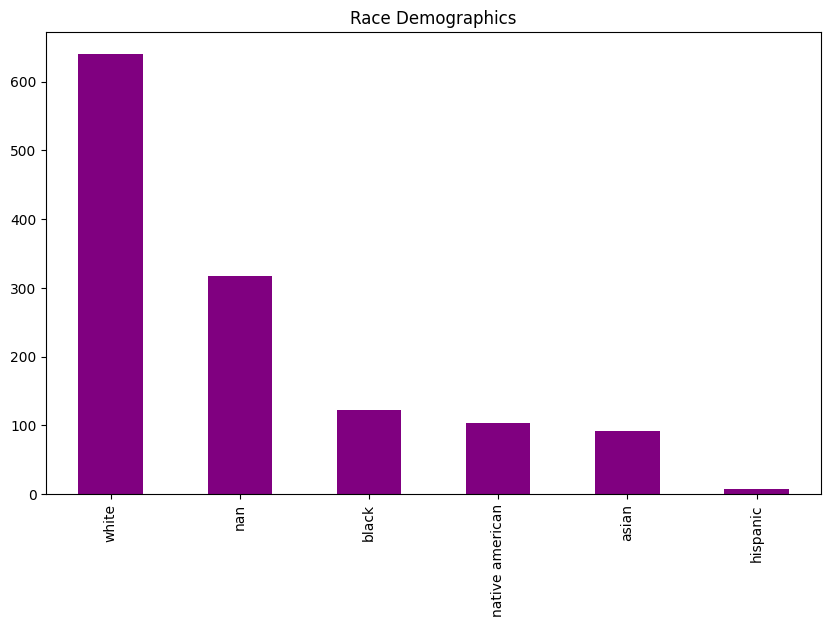

In [213]:
most_wanted.race_raw.value_counts().sort_values(ascending = False).plot(kind = 'bar', title="Race Demographics", color = 'purple', figsize=(10, 6));

---
## Warning message column:
* The warning message column contains mostly quite unique values
* First, I will put all text to lower case so that it is easier to work with
* I will create masks to summarize and categorize this data a bit more usefully
* I will apply the masks in order of priority, since some rows may contain more than one of the labels
* I will also rename the column so that it is just "warning"

In [214]:
most_wanted.warning_message = most_wanted.warning_message.str.lower()
most_wanted.warning_message.value_counts()

should be considered armed and dangerous                                                                        216
should be considered an international flight risk                                                                75
should be considered an escape risk                                                                              25
should be considered armed and dangerous and an escape risk                                                      21
should be considered armed and dangerous, an international flight risk, and an escape risk                       21
should be considered armed and extremely dangerous                                                               19
should be considered armed and dangerous and an international flight risk                                        13
should be considered armed and extremely dangerous and a high-risk arrest                                         3
these individuals should be considered an international flight risk     

#### Warning message column masks:

In [215]:
armed_dangerous_mask = most_wanted.warning_message.str.contains("armed", na=False)
flight_risk_mask = most_wanted.warning_message.str.contains("flight", na=False) | \
                   most_wanted.warning_message.str.contains("international", na=False) | \
                   most_wanted.warning_message.str.contains("escape", na=False) 
extremely_dangerous_mask = most_wanted.warning_message.str.contains("extremely", na=False)
mental_health_mask = most_wanted.warning_message.str.contains("suicidal", na=False) | \
                     most_wanted.warning_message.str.contains("medications", na=False)

#### Applying the masks:

In [216]:
most_wanted.race_raw = most_wanted.race_raw.astype(str)
most_wanted.warning_message = most_wanted.warning_message.mask(armed_dangerous_mask, 'armed and dangerous')
most_wanted.warning_message = most_wanted.warning_message.mask(flight_risk_mask, 'fligth/escape risk')
most_wanted.warning_message = most_wanted.warning_message.mask(extremely_dangerous_mask, 'extremely dangerous')
most_wanted.warning_message = most_wanted.warning_message.mask(mental_health_mask, 'mental health concern')
most_wanted.warning_message = most_wanted.warning_message.replace("", np.nan)

In [217]:
most_wanted.rename(columns = {"warning_message": "warning"}, inplace = True)
most_wanted.warning.value_counts()

armed and dangerous      229
fligth/escape risk       173
extremely dangerous       25
mental health concern      2
Name: warning, dtype: int64

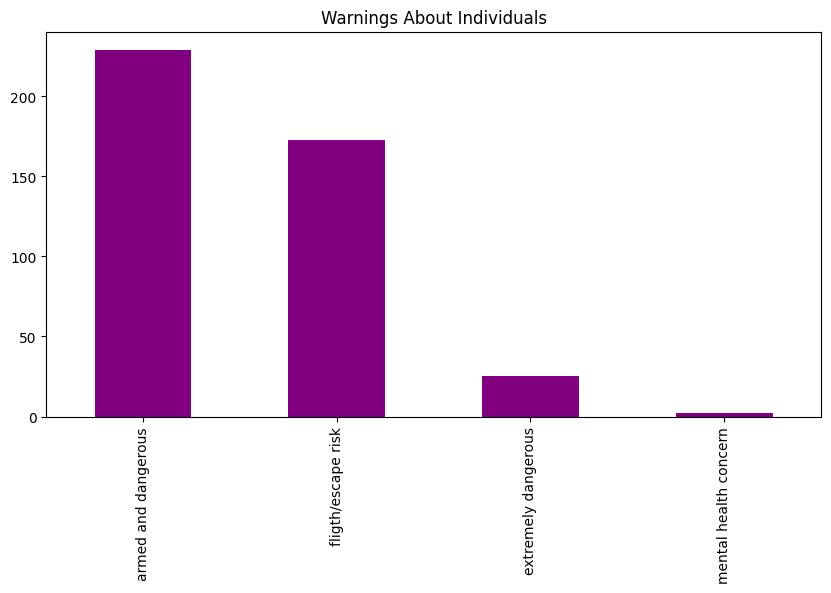

In [218]:
most_wanted.warning.value_counts().sort_values(ascending = False).plot(kind = 'bar', title="Warnings About Individuals", color = 'purple', figsize=(10, 5));

---
## Reward text column:
* This column is very unique to each situation, so I will not affect the data here
* However perhaps it would be interesting to see a wordcloud for this column

In [219]:
print('There are', most_wanted.reward_text.value_counts().sum(), 'mostly unique values in the reward_text column.')

There are 542 mostly unique values in the reward_text column.


#### Importing WordCloud and Matplotlib to display:

In [220]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

#### Creating the data and the wordcloud:

In [221]:
# creating the wordcloud corpus
reward_text = most_wanted.reward_text.dropna()
reward_corpus = ' '.join(reward_text)
reward_wordcloud = WordCloud(background_color = 'white',
                            height=750, width=1500,
                            max_words = 150).generate(reward_corpus)

#### Plotting the wordcloud:

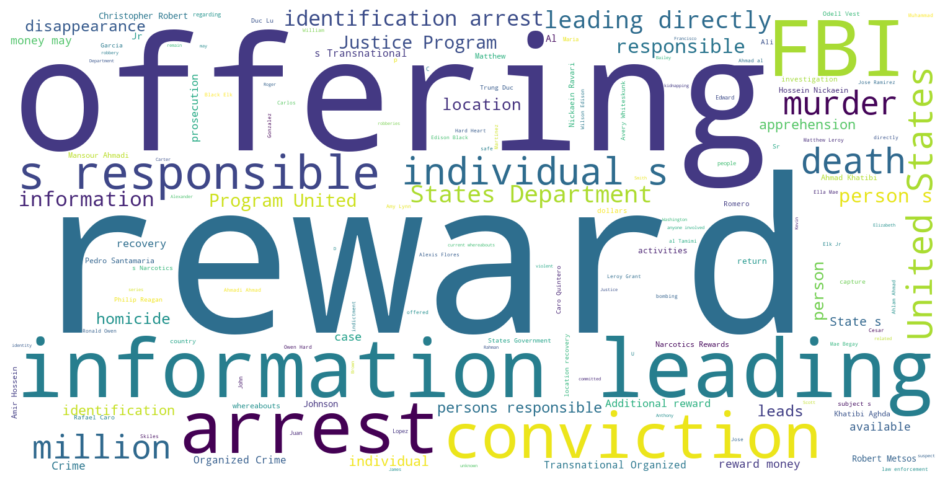

In [222]:
plt.figure(figsize = (12, 7))
plt.imshow(reward_wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

---
## Investigating the cleaned data:
* Now that our data is quite clean, let's investigate a few aspects beyond what we have already seen
* For example, here I am extracting a random selection from the those considered to be most dangerous criminals, labeled "armed and dangerous"

In [242]:
most_dangerous_mask = most_wanted.warning.str.contains("armed and dangerous", na=False)
most_dangerous = most_wanted.loc[most_dangerous_mask]
most_dangerous_examples = most_dangerous[['name', 'image', 'category', 'field_offices', 'warning']].sample(15)

In [243]:
HTML(most_dangerous_examples.to_html(escape = False, formatters=dict(image=path_to_image_html)))

,name,image,category,field_offices,warning
2,ABDULLAH SHAIR KHAN,,Seeking Information - Terrorism,Washington D.C.,armed and dangerous
18,LEO FREDERICK BURT,,Domestic Terrorism,Milwaukee,armed and dangerous
16,CHARLES LEE HILL,,Violent Crime - Murders,Albuquerque,armed and dangerous
0,JUAN DIOS GARZA,,Violent Crime - Murders,Miami,armed and dangerous
12,D.C.-AREA HOTEL RAPIST,,Seeking Information,Washington D.C.,armed and dangerous
3,JORGE RUEDA LANDEROS,,Violent Crime - Murders,Baltimore,armed and dangerous
7,OSCAR D. VEGA,,Criminal Enterprise Investigations,Chicago,armed and dangerous
6,BAJRAM ASLLANI,,Seeking Information,Charlotte,armed and dangerous
10,ALI ATWA,,Most Wanted Terrorists,Washington D.C.,armed and dangerous
1,ZAHIDUL ISLAM,,Additional Violent Crimes,Philadelphia,armed and dangerous
